In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 



In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
183,184,Female,29,98,88
18,19,Male,52,23,29
191,192,Female,32,103,69
197,198,Male,32,126,74
11,12,Female,35,19,99


In [5]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
x = df.iloc[:,[3,4]].values

In [9]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [10]:
from sklearn.cluster import KMeans


In [11]:
sse = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++',random_state = 0)
    model.fit(x)
    sse.append(model.inertia_)

c:\Users\smdar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\smdar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\smdar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\smdar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

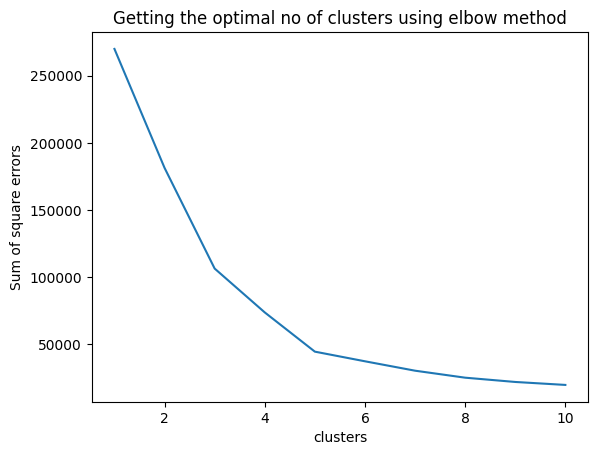

In [12]:
plt.plot(range(1,11),sse)
plt.title('Getting the optimal no of clusters using elbow method')
plt.xlabel('clusters')
plt.ylabel('Sum of square errors')
plt.show()

In [13]:
# the optimal no of clusters is found to be 5

model = KMeans(n_clusters=5,init = 'k-means++',random_state =0)
y_pred = model.fit_predict(x)

c:\Users\smdar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


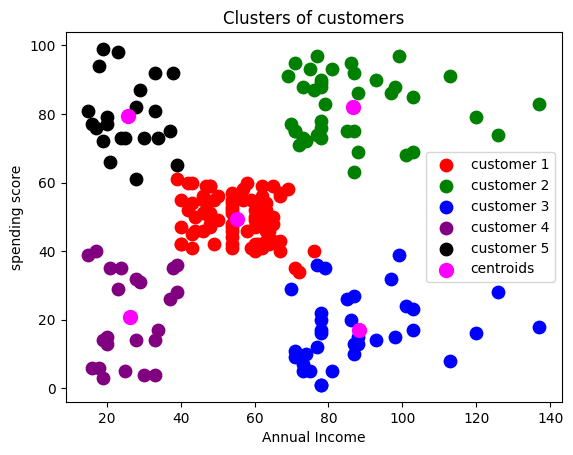

In [17]:
plt.scatter(x[y_pred == 0,0],x[y_pred == 0,1],s = 80,c = 'red',label = 'customer 1')
plt.scatter(x[y_pred == 1,0],x[y_pred == 1,1],s = 80,c = 'green',label = 'customer 2')
plt.scatter(x[y_pred == 2,0],x[y_pred == 2,1],s = 80,c = 'blue',label = 'customer 3')
plt.scatter(x[y_pred == 3,0],x[y_pred == 3,1],s = 80,c = 'purple',label = 'customer 4')
plt.scatter(x[y_pred == 4,0],x[y_pred == 4,1],s = 80,c = 'black',label = 'customer 5')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s =100,c = 'magenta',label = 'centroids')
plt.title("Clusters of customers")
plt.xlabel("Annual Income")
plt.ylabel("spending score")
plt.legend()
plt.show()